Author: Nguyen Thi Thu Hang

#Linear Regression with Pytorch

In this code, I will hands on Machine Learning coding skill with Linear Regression. The dataset is used in this project is **advertising.csv** with 4 features
**[TV, Radio, Newspaper, Sales]**. Specifically, three independent features are TV, Radio, Newspaper anf one dependent fature is Sales.


In [1]:
!git clone https://github.com/NT-ThuHang/Hands_On_Machine_Learning_With_Pytorch.git
%cd /content/Hands_On_Machine_Learning_With_Pytorch

fatal: destination path 'Hands_On_Machine_Learning_With_Pytorch' already exists and is not an empty directory.
/content/Hands_On_Machine_Learning_With_Pytorch


##Linear Regression

### 1)What is Linear Regression?
---

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

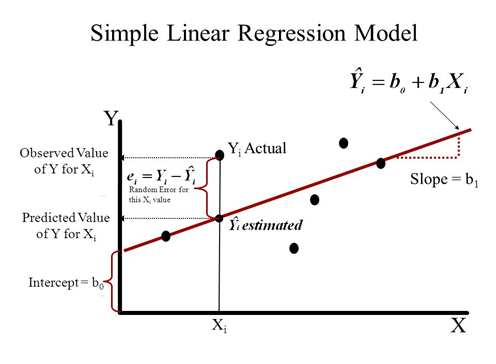


### 2)What are types of Linear Regression?  

---


+ Simple linear regression uses traditional slope-intercept form. $x$ represents our input data and 𝑦 represents our prediction. $$y = x \times w+b$$

+ A more complex, multi-variable linear equation might look like this, where $w$ represents the coefficients, or weights, our model will try to learn. $$f(x,y,z) = w_1 \times x+ w_2 \times y+w_3 \times z + b$$

Example, the variables $x, y, z$ represent the attributes, or distinct pieces of information, we have about each observation. For sales predictions, these attributes might include a company’s advertising spend on radio, TV, and newspapers.$$Sales = w_1 \times TV + w_2 \times Radio + w_3 \times Newspaper + b$$

### 3)How can you check if the Regression model fits the data well?  

---



+ The Mean Squared Error measures the variance of the residuals and is used when we want to punish the outliers in the dataset. It's defined as:

$$MSE = \frac{1}{N} \sum_{i=1}^N(y_i - \hat{y})^2$$

+ The Mean Absolute Error measures the average of the residuals in the dataset. Is used when we don’t want outliers to play a big role. It can also be useful if we know that our distribution is multimodal, and it’s desirable to have predictions at one of the modes, rather than at the mean of them. It's defined as:

$$MAE = \frac{1}{N} \sum_{i=1}^n |y_i -\hat{y}|$$

### 4) How would you detect Overfitting in Linear Models? 

---


The common pattern for overfitting can be seen on learning curve plots, where model performance on the training dataset continues to improve (e.g. loss or error continues to fall) and performance on the test or validation set improves to a point and then begins to get worse.
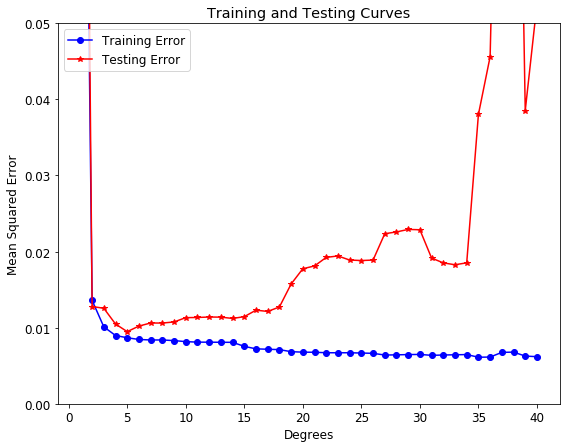

So an overfit model will have extremely low training error but a high testing error.

### 5)What's the difference between Covariance and Correlation? 
---
+ **Covariance** measures whether a variation in one variable results in a variation in another variable, and deals with the linear relationship of only 2 variables in the dataset. Its value can take range from $-\infty$ to $\infty$. Simply speaking Covariance indicates the direction of the linear relationship between variables.

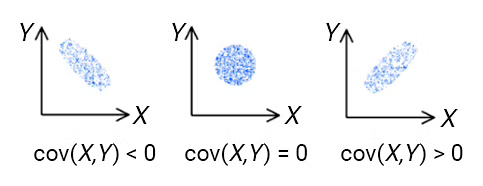

+ Correlation measures how strongly two or more variables are related to each other. Its values are between -1 to 1. Correlation measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance.

### 6) Provide an intuitive explanation of the Learning Rate?  
---
The **Learning Rate **is a **hyper-parameter** that can determine the speed or step size at each iteration while moving towards a minimal point in Gradient Descent. This value should not be too small or too high because if it's too small then it takes too much time to converge and if it's too large then the step size will increase and it moves quickly and never reach a global minima point even after repeated iterations.
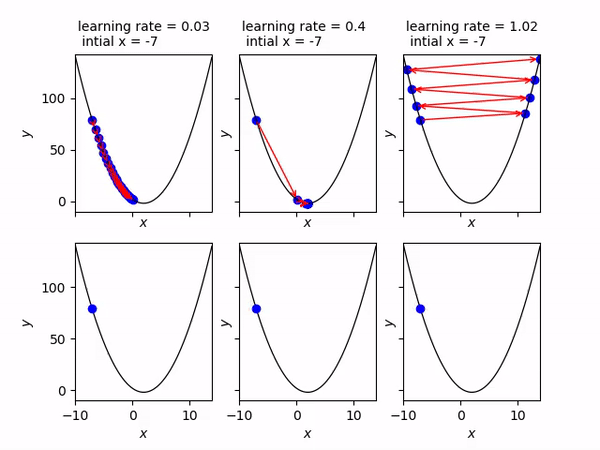

### 7) How is the Error calculated in a Linear Regression model?  
1. Measuring the distance of the observed y-values from the predicted y-values at each value of x.
2. Squaring each of these distances.
3. Calculating the mean of each of the squared distances. $$MSE = \frac{1}{N} \sum_{i=1}^N(y_i - \hat{y})$$
4. The smaller the Mean Squared Error, the closer you are to finding the line of best fit
5. How bad or good is this final value always depends on the context of the problem, but the main goal is that its value is so minimal as possible.
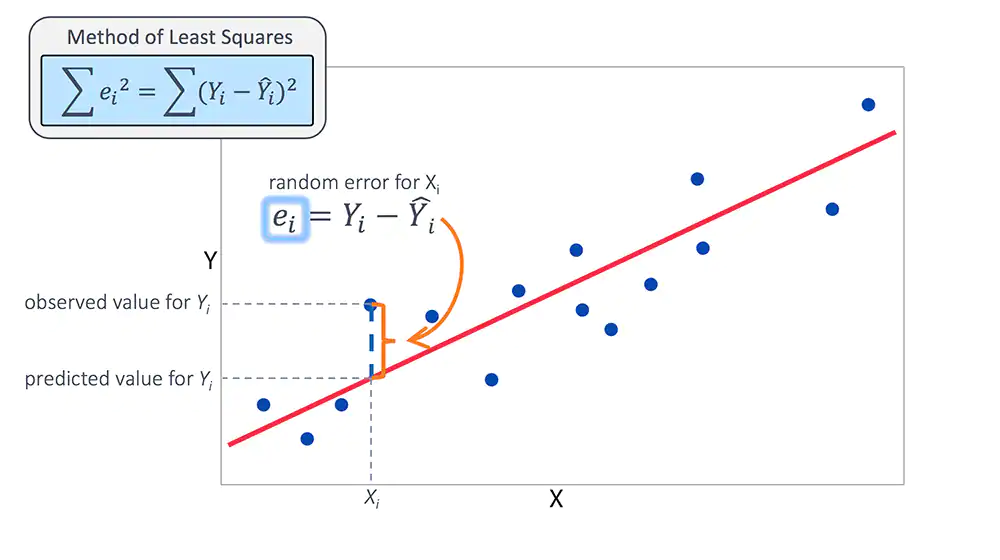


### 8) Explain the intuition behind Gradient Descent algorithm
---
Gradient descent is an optimization algorithm that’s used when training a machine learning model and is based on a convex function and tweaks its parameters iteratively to minimize a given function to its local minimum (that is, slope = 0).

For a start, we have to select a random bias and weights, and then iterate over the slope function to get a slope of 0.
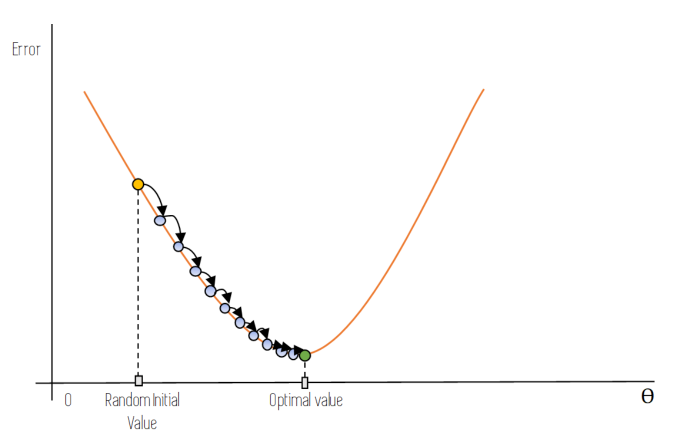
The way we change update the value of the bias and weights is through a variable called the learning rate. We have to be wise on the learning rate because choosing:

+ A small leaning rate may lead to the model to take some time to learn
+ A large learning rate will make the model converge as our pointer will shoot and we’ll not be able to get to minima.
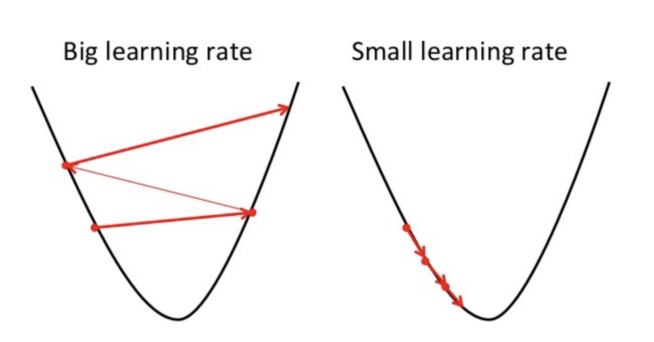


### 9) Define Linear Regression and its structure 
+ Linear regression is a linear approach for modeling the relationship between a scalar response and one or more explanatory variables.
+ In a supervised linear regression, the model tries to find a linear relationship between the input and output data points. This linear relationship is a straight line if graphed.
+ If there is only one explanatory variable it is called simple linear regression, and if there are more than one explanatory variable it is called multiple linear regression.
+ A linear function is given by the following equation: $$Y = X \times W + b$$
where all the variables are matrices containing data points.

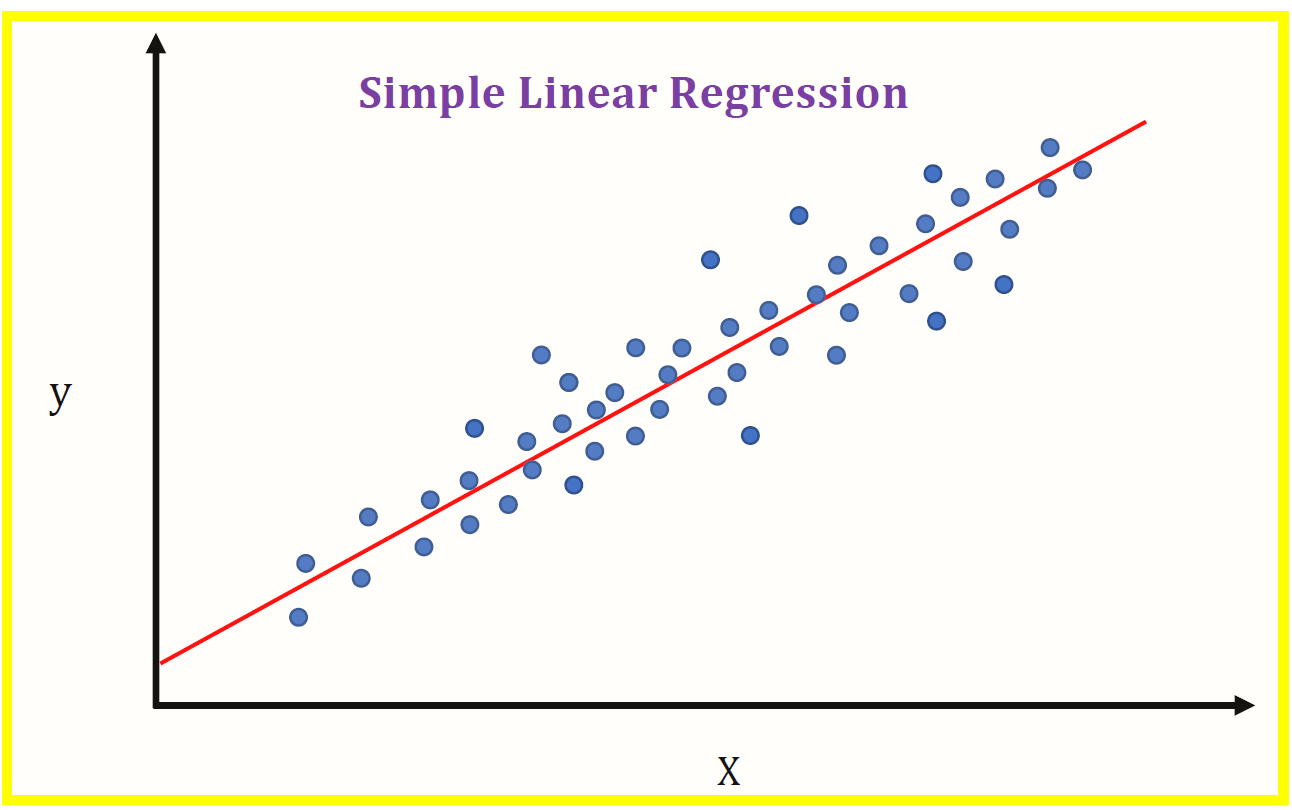

### 11) How does a Non-Linear regression analysis differ from Linear regression analysis?  
+ Non-linear functions have variables with powers greater than 1. Like $x^2$ if these non-linear functions are graphed, they do not produce a straight line (their direction changes constantly).
+ Linear functions have variables with only powers of 1. They form a straight line if it is graphed.
+ Non-linear regression analysis tries to model a non-linear relationship between the independent and dependent variables.
+ A simple non-linear relationship is shown below:
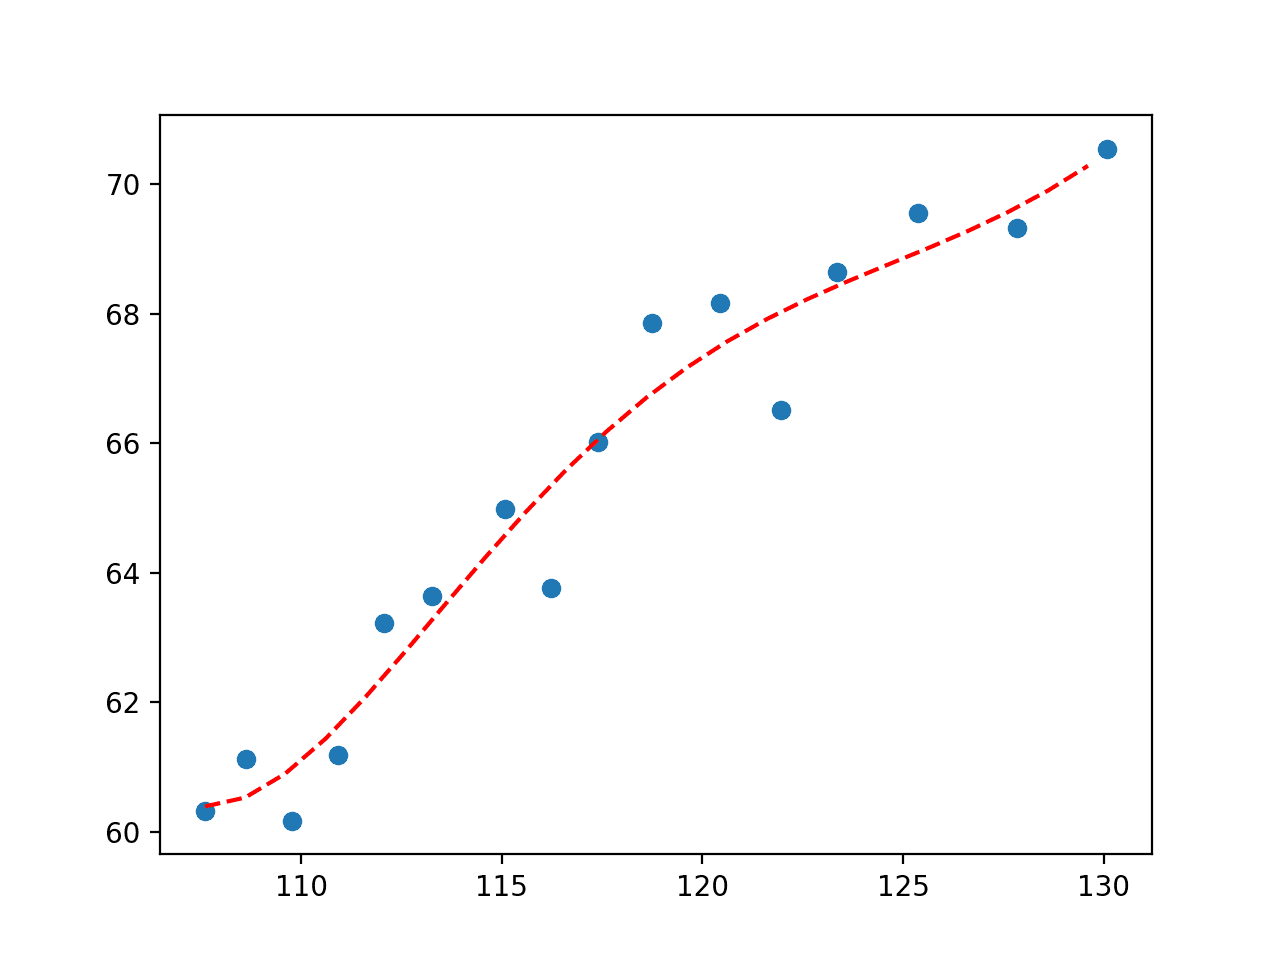
+ Linear regression analysis tries to model a linear relationship between the independent and dependent variables.
+ A simple linear relationship is shown below:

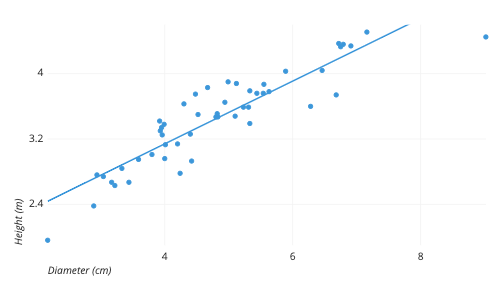

##Library

In [16]:
#standard 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

#modeling
import torch
from torch.autograd import Variable
from torch import nn

#evaluate
from sklearn.metrics import mean_squared_error as MSE

In [3]:
# set default device based on CUDA's availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

##Load dataset


In [4]:
dataset = pd.read_csv("./Dataset/advertising.csv")
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##Preprocessing



###Missing Data problem 

In [5]:
#finding missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Scaler

In [6]:
#get x, y
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
scaler = StandardScaler()
X_train_scl = torch.tensor(scaler.fit_transform(X_train), dtype = torch.float).to(device)
X_test_scl = torch.tensor(scaler.fit_transform(X_test), dtype = torch.float).to(device)
y_train = torch.tensor(y_train, dtype = torch.float).to(device)
y_test = torch.tensor(y_test, dtype = torch.float)

###Prepare Data

In [8]:
class AdvertisingDataset(Dataset):
  def __init__(self, X, y):
    super().__init__()
    self.X = X
    self.y = y
  
  def __len__(self):
    return self.X.size()[0]
  
  def __getitem__(self, idx):
    x = self.X[idx]
    y = self.y[idx]
    return [x,y]

In [9]:
batch_size = 16
train_data = DataLoader(AdvertisingDataset(X_train_scl, y_train), batch_size=batch_size, shuffle=True)

##Modeling

In [10]:
class LinearRegression(nn.Module):
  def __init__(self, inputSize, outputSize):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(inputSize, outputSize)

  def forward(self, x):
    output = self.linear(x)
    return output

In [11]:
#Set up Hyperparameters
class Configs_Hyperparameters(object):
  def __init__(self):
    self.inputDim = X_train_scl.shape[1] 
    self.outputDim = 1
    self.lr = 0.005
    self.momentum = 0.9
    self.epochs = 1000

In [12]:
config = Configs_Hyperparameters()
model = LinearRegression(config.inputDim, config.outputDim).to(device)
loss_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = config.lr, momentum = config.momentum)

##Traing Phase

In [13]:
num_batches = int(X_train.shape[0] / batch_size)
losses = []

for epoch in range(config.epochs):
  epoch_loss = 0
  #inner loop
  for i, (data, target) in enumerate(train_data):
    #get samples
    data = Variable(data.to(device))
    target = Variable(target.to(device))

    #predict (forward propagation through the network)
    pred = model(data)
    #compute loss
    loss = loss_func(target, pred)

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

    #update total loss
    epoch_loss += loss.item()
  epoch_loss /= X_train.shape[0]
  if (epoch%10 == 0) or (epoch == config.epochs-1):
    print("Epoch {}, Loss: {}".format(epoch, epoch_loss))
  losses.append(epoch_loss)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss: 13.04574213027954
Epoch 10, Loss: 1.6301654815673827
Epoch 20, Loss: 1.6335298418998718
Epoch 30, Loss: 1.631870698928833
Epoch 40, Loss: 1.6338134288787842
Epoch 50, Loss: 1.6311063289642334
Epoch 60, Loss: 1.6338143408298493
Epoch 70, Loss: 1.6288044452667236
Epoch 80, Loss: 1.6323261976242065
Epoch 90, Loss: 1.6344274163246155
Epoch 100, Loss: 1.6230812430381776
Epoch 110, Loss: 1.6392632603645325
Epoch 120, Loss: 1.6328662753105163
Epoch 130, Loss: 1.632017159461975
Epoch 140, Loss: 1.6338100910186768
Epoch 150, Loss: 1.628189754486084
Epoch 160, Loss: 1.6360493183135987
Epoch 170, Loss: 1.635873305797577
Epoch 180, Loss: 1.6356284141540527
Epoch 190, Loss: 1.6317584097385407
Epoch 200, Loss: 1.614359015226364
Epoch 210, Loss: 1.6327897906303406
Epoch 220, Loss: 1.6350517928600312
Epoch 230, Loss: 1.6327361702919005
Epoch 240, Loss: 1.6350009799003602
Epoch 250, Loss: 1.6292950212955475
Epoch 260, Loss: 1.63494530916214
Epoch 270, Loss: 1.6408611953258514
Epoch 280, 

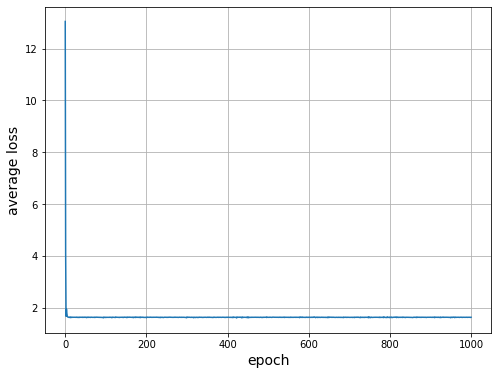

In [14]:
plt.figure(num=None, figsize=(8, 6))
plt.plot(losses)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch', fontsize=14)
plt.ylabel('average loss', fontsize=14)
plt.show()

##Testing Phase

In [19]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(X_test_scl).cpu().data.numpy()
    else:
        predicted = model(X_test_scl).data.numpy()
    print(np.sqrt(MSE(predicted, y_test)))

5.564448
